In [2]:
import pyaudio
import wave

def record_audio(output_file, duration=5, sample_rate=44100, chunk_size=1024, format=pyaudio.paInt16, channels=1):
    audio = pyaudio.PyAudio()

    stream = audio.open(format=format,
                        channels=channels,
                        rate=sample_rate,
                        input=True,
                        frames_per_buffer=chunk_size)

    print("Recording...")

    frames = []

    for i in range(0, int(sample_rate / chunk_size * duration)):
        data = stream.read(chunk_size)
        frames.append(data)

    print("Finished recording.")

    stream.stop_stream()
    stream.close()
    audio.terminate()

    wf = wave.open(output_file, 'wb')
    wf.setnchannels(channels)
    wf.setsampwidth(audio.get_sample_size(format))
    wf.setframerate(sample_rate)
    wf.writeframes(b''.join(frames))
    wf.close()

    print(f"Audio saved to {output_file}")

if __name__ == "__main__":
    output_file = "stdev.wav" 
    duration = 5
    record_audio(output_file, duration)

Recording...
Finished recording.
Audio saved to stdev.wav


<function matplotlib.pyplot.show(close=None, block=None)>

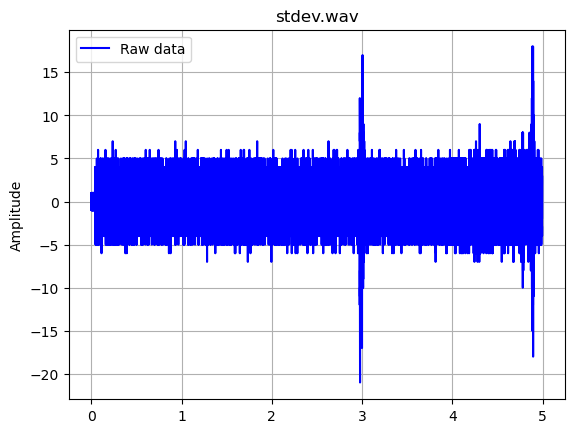

In [3]:
import matplotlib.pyplot as plt
from scipy.io.wavfile import read
import numpy as np

sample_rate, waveform = read(output_file)
time = np.arange(len(waveform)) / sample_rate

plt.plot(time, waveform, color='blue', label='Raw data')
plt.ylabel('Amplitude')
plt.grid(True)
plt.title(output_file)
plt.legend()
plt.show